In [1]:
from utils.tram_models import *
from utils.tram_data import *
from utils.loss_continous import *
from sklearn.model_selection import train_test_split
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(42)

### fit and sample for 1 continous TRAM

### normally distributed

In [2]:
# # Generate data

# x1 = torch.randn(10_000)
# df=pd.DataFrame(x1.numpy(), columns=['x1'])

# min_max = np.quantile(x1, [0.05, 0.95])


# # train
# train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
# # Validation and test
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

# hist = torch.histc(x1, bins=100, min=-3, max=3)
# bins = torch.linspace(-3, 3, steps=100)
# # Plot
# plt.figure(figsize=(8, 4))
# plt.bar(bins.numpy(), hist.numpy(), width=0.06, align='center')
# plt.title("Histogram of Normally Distributed Data")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.show()





### Bimodal

In [3]:


# # Generate bimodal data
# n = 10_000
# x1 = torch.cat([
#     torch.normal(mean=-2.0, std=1.0, size=(n // 2,)),
#     torch.normal(mean=2.0, std=1.0, size=(n // 2,))
# ])

# # Put in DataFrame
# df = pd.DataFrame(x1.numpy(), columns=['x1'])

# # Min-max (5th and 95th percentiles)
# min_max = np.quantile(x1.numpy(), [0.05, 0.95])

# # Split into train, validation, and test sets
# train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

# # Histogram for visualization
# hist = torch.histc(x1, bins=100, min=-6, max=6)
# bins = torch.linspace(-6, 6, steps=100)

# # Plot the histogram
# plt.figure(figsize=(8, 4))
# plt.bar(bins.numpy(), hist.numpy(), width=0.12, align='center')
# plt.title("Histogram of Bimodal Data")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.show()


### lognormal

Train size: 8000, Validation size: 1000, Test size: 1000


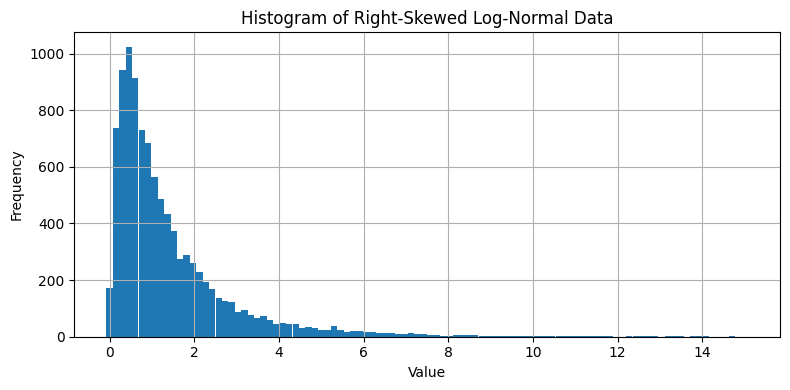

In [4]:
# Generate right-skewed data using log-normal distribution
n = 10_000
mean = 0.0
std = 0.9
x1 = torch.distributions.LogNormal(mean, std).sample((n,))

# Put in DataFrame
df = pd.DataFrame(x1.numpy(), columns=['x1'])

# Min-max (5th and 95th percentiles)
min_max = np.quantile(x1.numpy(), [0.05, 0.95])

# Split into train, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

# Histogram for visualization
hist = torch.histc(x1, bins=100, min=0, max=15)
bins = torch.linspace(0, 15, steps=100)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.bar(bins.numpy(), hist.numpy(), width=0.15, align='center')
plt.title("Histogram of Right-Skewed Log-Normal Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Dataloader

In [5]:
target_col='x1'
batch_size=1024


train_dataset = GenericDataset(train_df, target_col=target_col, data_type=None,  transform=None)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

val_dataset = GenericDataset(val_df, target_col=target_col, data_type=None,  transform=None)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

test_dataset = GenericDataset(test_df, target_col=target_col, data_type=None,  transform=None)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

for x,y in train_loader:
    print(x)
    print(y)
    break

[tensor([1., 1., 1.,  ..., 1., 1., 1.])]
tensor([1.1226, 1.6087, 0.9162,  ..., 0.5953, 0.4814, 1.2994])


SI Model

In [6]:
tram_model=TramModel(SimpleIntercept())
tram_model

TramModel(
  (nn_int): SimpleIntercept(
    (fc): Linear(in_features=1, out_features=20, bias=False)
  )
)

Hyperparams

In [7]:
epochs = 700 # set to max epoch , if moedl was trained to 500 eps and you nedd 2000 more set to 700

Train Model

Train with GPU support.


✓ Epoch 001 | Val Loss Improved: 3.0185 (Saved model)
✓ Epoch 002 | Val Loss Improved: 2.9700 (Saved model)
✓ Epoch 003 | Val Loss Improved: 2.9231 (Saved model)
✓ Epoch 004 | Val Loss Improved: 2.8778 (Saved model)
✓ Epoch 005 | Val Loss Improved: 2.8341 (Saved model)
✓ Epoch 006 | Val Loss Improved: 2.7921 (Saved model)
✓ Epoch 007 | Val Loss Improved: 2.7517 (Saved model)
✓ Epoch 008 | Val Loss Improved: 2.7127 (Saved model)
✓ Epoch 009 | Val Loss Improved: 2.6753 (Saved model)
✓ Epoch 010 | Val Loss Improved: 2.6393 (Saved model)
✓ Epoch 011 | Val Loss Improved: 2.6046 (Saved model)
✓ Epoch 012 | Val Loss Improved: 2.5713 (Saved model)
✓ Epoch 013 | Val Loss Improved: 2.5392 (Saved model)
✓ Epoch 014 | Val Loss Improved: 2.5083 (Saved model)
✓ Epoch 015 | Val Loss Improved: 2.4785 (Saved model)
✓ Epoch 016 | Val Loss Improved: 2.4499 (Saved model)
✓ Epoch 017 | Val Loss Improved: 2.4223 (Saved model)
✓ Epoch 018 | Val Loss Improved: 2.3958 (Saved model)
✓ Epoch 019 | Val Loss Impro

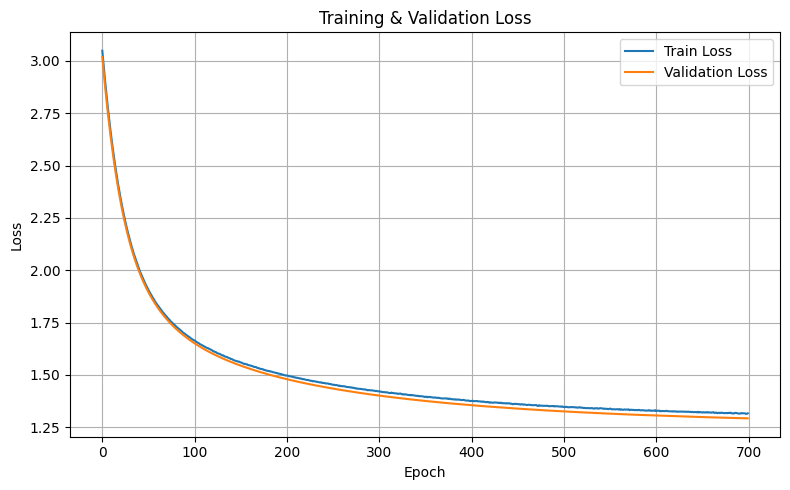

In [8]:
TRAIN_AGAIN = True


experiment = 'x_lognormal'

DEV_LOG_DIR = '/home/bule/TramDag/dev_experiment_logs'
EXPERIMENT_DIR = os.path.join(DEV_LOG_DIR, experiment)
os.makedirs(EXPERIMENT_DIR, exist_ok=True)

CHECKPOINT_PATH = os.path.join(EXPERIMENT_DIR, f'{experiment}.pt')
HIST_PATH = os.path.join(EXPERIMENT_DIR, f'{experiment}_hist.pt')

start_epoch = 0
train_loss_hist, val_loss_hist = [], []



if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Train with GPU support.")
else:
    device = torch.device('cpu')
    print("No GPU found, train with CPU support.")

optimizer = torch.optim.Adam(tram_model.parameters(), lr=0.01, eps=1e-7, weight_decay=0.0)




if TRAIN_AGAIN:
    # Resume model and history if available
    if os.path.exists(CHECKPOINT_PATH) and os.path.exists(HIST_PATH):
        print("Resuming from previous checkpoint...")
        tram_model.load_state_dict(torch.load(CHECKPOINT_PATH))
        tram_model.to(device)
        tram_model.train()

        history = torch.load(HIST_PATH)
        train_loss_hist = history.get("train", [])
        val_loss_hist = history.get("val", [])
        start_epoch = len(train_loss_hist)
        print(f"Resuming from epoch {start_epoch}...")

    best_val_loss = min(val_loss_hist) if val_loss_hist else float('inf')

    for epoch in range(start_epoch, epochs):
        # === TRAIN ===
        tram_model.train()
        train_loss = 0.0

        for x, y in train_loader:
            x = [xi.to(device) for xi in x]
            y = y.to(device)

            optimizer.zero_grad()
            y_pred = tram_model(int_input=x[0].unsqueeze(1))
            loss = contram_nll(y_pred, y, min_max=min_max)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_loss_hist.append(avg_train_loss)

        # === VALIDATION ===
        tram_model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for x_val, y_val in val_loader:
                x_val = [xi.to(device) for xi in x_val]
                y_val = y_val.to(device)

                y_val_pred = tram_model(int_input=x_val[0].unsqueeze(1))
                loss_val = contram_nll(y_val_pred, y_val, min_max=min_max)
                val_loss += loss_val.item()

        avg_val_loss = val_loss / len(val_loader)
        val_loss_hist.append(avg_val_loss)

        # === SAVE MODEL IF BEST ===
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(tram_model.state_dict(), CHECKPOINT_PATH)
            print(f"✓ Epoch {epoch+1:03d} | Val Loss Improved: {avg_val_loss:.4f} (Saved model)")
        else:
            print(f"Epoch {epoch+1:03d} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        # === SAVE HISTORY ===
        torch.save({"train": train_loss_hist, "val": val_loss_hist}, HIST_PATH)

else:
    print(" Loading model for evaluation only...")
    tram_model.load_state_dict(torch.load(CHECKPOINT_PATH))
    tram_model.to(device)
    tram_model.eval()

    if os.path.exists(HIST_PATH):
        history = torch.load(HIST_PATH)
        train_loss_hist = history.get("train", [])
        val_loss_hist = history.get("val", [])

# === PLOT LOSSES ===
plt.figure(figsize=(8, 5))
plt.plot(train_loss_hist, label='Train Loss')
plt.plot(val_loss_hist, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Sample from distribution 


1. sample from logistic
2. find xj such that h(xj)-uj=0


In [23]:

for x, y in train_loader:
    x = [xi.to(device) for xi in x] # data ordered as in ordered_parents() 
    outputs = tram_model(int_input=x[0].unsqueeze(1))
    print(x)
    break

[tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0')]


In [10]:
from utils.loss_continous import *


### thetas and shifts

- for source nodes thetas do only depend on 1 therefor are same for each sample

In [11]:
outputs['int_out']

tensor([[-41.7023,  23.3441,  16.3601,  ...,  -0.0551,   4.5372,   1.6894],
        [-41.7023,  23.3441,  16.3601,  ...,  -0.0551,   4.5372,   1.6894],
        [-41.7023,  23.3441,  16.3601,  ...,  -0.0551,   4.5372,   1.6894],
        ...,
        [-41.7023,  23.3441,  16.3601,  ...,  -0.0551,   4.5372,   1.6894],
        [-41.7023,  23.3441,  16.3601,  ...,  -0.0551,   4.5372,   1.6894],
        [-41.7023,  23.3441,  16.3601,  ...,  -0.0551,   4.5372,   1.6894]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [12]:
# transform thetas
thetas=transform_intercepts_continous(outputs['int_out'])
thetas

tensor([[-48.6338, -25.2897,  -8.9296,  ...,  53.2843,  57.8321,  59.6910],
        [-48.6338, -25.2897,  -8.9296,  ...,  53.2843,  57.8321,  59.6910],
        [-48.6338, -25.2897,  -8.9296,  ...,  53.2843,  57.8321,  59.6910],
        ...,
        [-48.6338, -25.2897,  -8.9296,  ...,  53.2843,  57.8321,  59.6910],
        [-48.6338, -25.2897,  -8.9296,  ...,  53.2843,  57.8321,  59.6910],
        [-48.6338, -25.2897,  -8.9296,  ...,  53.2843,  57.8321,  59.6910]],
       device='cuda:0', grad_fn=<SubBackward0>)

### check h_extrapolated_sample

In [13]:
h_extrapolated_with_shift(thetas, targets=x[0], shifts=outputs['shift_out'], k_min=min_max[0], k_max=min_max[1])
# seem to work output is same for all

tensor([0.0201, 0.0201, 0.0201,  ..., 0.0201, 0.0201, 0.0201], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

### sample from stanadrt logistic

In [14]:
# from scipy.stats import logistic
# samples = logistic.rvs(size=100000)

# Torch
def sample_standard_logistic(shape, epsilon=1e-7, device=None):
    uniform_samples = torch.rand(shape, device=device)
    clipped = torch.clamp(uniform_samples, epsilon, 1 - epsilon)
    logistic_samples = torch.log(clipped / (1 - clipped))
    return logistic_samples

# num_samples = 100_000
# num_samples = 100

# samples = sample_standard_logistic((num_samples,)).cpu().numpy()

# plt.figure(figsize=(8, 5))
# plt.hist(samples, bins=100, density=True, alpha=0.6, label='Sampled Histogram')

In [ ]:
n = 10_000  # Desired number of latent samples

latent_sample = sample_standard_logistic((n,), device=thetas.device)


theta_single = thetas[0]  # Shape: (20,)
thetas_expanded = theta_single.unsqueeze(0).repeat(n, 1)  # Shape: (n, 20)
shifts = torch.zeros(n, device=thetas.device)

targets = torch.full((n,), 1.0, device=thetas.device)


low = torch.full((n,), -1e5, device=thetas.device)
high = torch.full((n,), 1e5, device=thetas.device)



In [16]:
def vectorized_object_function( thetas: torch.Tensor,targets: torch.Tensor, shifts: torch.Tensor,
                               latent_sample: torch.Tensor, k_min: float, k_max: float) -> torch.Tensor:
    """
    Args:
        t: shape (n,)
    Returns:
        shape (n,)
    """
    return h_extrapolated_with_shift(thetas, targets, shifts, k_min, k_max) - latent_sample


### Bisection


In [17]:
def bisection_root_finder(f, low, high, max_iter=1000, tol=1e-7):
    """
    Pure PyTorch scalar root-finder (element-wise bisection).
    f: function that accepts tensor of shape (n,)
    low, high: tensors of shape (n,)
    Returns: tensor of shape (n,)
    """
    for _ in range(max_iter):
        mid = (low + high) / 2.0
        f_mid = f(mid)
        f_low = f(low)

        # Where sign changes, root is between low and mid; else mid and high
        sign_change = f_low * f_mid < 0
        high = torch.where(sign_change, mid, high)
        low = torch.where(sign_change, low, mid)

        if torch.max(torch.abs(high - low)) < tol:
            break

    return (low + high) / 2.0


In [18]:
root = bisection_root_finder(
    lambda targets: vectorized_object_function(
        thetas_expanded,
        targets,
        shifts,
        latent_sample,
        k_min=min_max[0],
        k_max=min_max[1]
    ),
    low,
    high
)


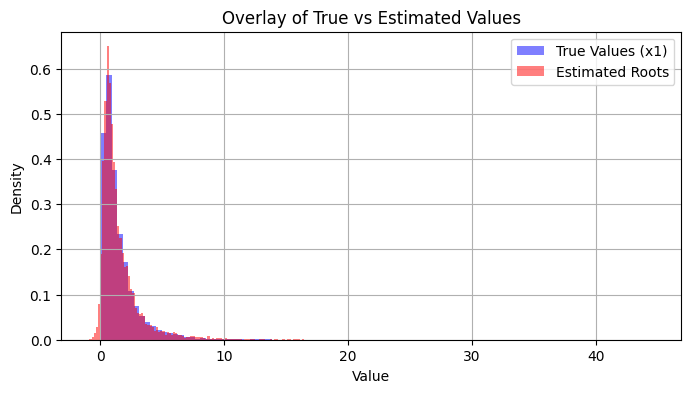

In [19]:

# Move tensors to CPU and convert to NumPy
x1_np = x1.detach().cpu().numpy()        # True values (bimodal)
root_np = root.detach().cpu().numpy()    # Estimated roots

# Plot overlaid histograms
plt.figure(figsize=(8, 4))
plt.hist(x1_np, bins=100, alpha=0.5, label='True Values (x1)', color='blue', density=True)
plt.hist(root_np, bins=100, alpha=0.5, label='Estimated Roots', color='red', density=True)

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Overlay of True vs Estimated Values")
plt.legend()
plt.grid(True)
plt.show()


## Chandrupta

In [20]:
# def chandrupatla_root_finder(f, low, high, max_iter=1000, tol=1e-6):
#     """
#     Pure PyTorch vectorized Chandrupatla root finder (bracketing-based).
#     Based on T. R. Chandrupatla's 1997 paper.
    
#     Args:
#         f: Callable that takes a tensor of shape (n,) and returns a tensor of shape (n,)
#         low, high: Tensors of shape (n,) defining the initial bracket [a, b]
#         max_iter: Maximum number of iterations
#         tol: Convergence tolerance (applied to interval size)
    
#     Returns:
#         Tensor of shape (n,) with estimated roots
#     """
#     a, b = low.clone(), high.clone()
#     fa = f(a)
#     fb = f(b)

#     # Ensure f(a) and f(b) bracket the root
#     mask = fa * fb < 0
#     assert mask.all(), "Chandrupatla requires valid bracketing interval (fa * fb < 0)."

#     c = a.clone()
#     fc = fa.clone()
#     d = b - a
#     e = d.clone()

#     for _ in range(max_iter):
#         cond = (fa != fc) & (fb != fc)
#         # Inverse quadratic interpolation
#         s = torch.where(
#             cond,
#             a * fb * fc / ((fa - fb) * (fa - fc)) +
#             b * fa * fc / ((fb - fa) * (fb - fc)) +
#             c * fa * fb / ((fc - fa) * (fc - fb)),
#             # Linear interpolation fallback
#             b - fb * (b - a) / (fb - fa)
#         )

#         # Clamp `s` to be within [min(a,b), max(a,b)]
#         min_ab = torch.min(a, b)
#         max_ab = torch.max(a, b)
#         s = torch.clamp(s, min_ab, max_ab)

#         fs = f(s)

#         cond1 = fa * fs < 0
#         cond2 = ~cond1 & (fb * fs < 0)

#         c = b.clone()
#         fc = fb.clone()

#         # Update brackets
#         a = torch.where(cond1, a, b)
#         fa = torch.where(cond1, fa, fb)

#         b = s
#         fb = fs

#         # Update d and e
#         d_new = b - a
#         d = e.clone()
#         e = d_new

#         # Check convergence
#         if torch.max(torch.abs(b - a)) < tol:
#             break

#     return b


In [21]:
# root = chandrupatla_root_finder(
#     lambda targets: vectorized_object_function(
#         thetas_expanded,
#         targets,
#         shifts,
#         latent_sample,
#         k_min=min_max[0],
#         k_max=min_max[1]
#     ),
#     low,
#     high
# )


In [22]:
# import matplotlib.pyplot as plt

# # Move tensors to CPU and convert to NumPy
# x1_np = x1.detach().cpu().numpy()        # True values (bimodal)
# root_np = root.detach().cpu().numpy()    # Estimated roots

# # Plot overlaid histograms
# plt.figure(figsize=(8, 4))
# plt.hist(x1_np, bins=100, alpha=0.5, label='True Values (x1)', color='blue', density=True)
# plt.hist(root_np, bins=100, alpha=0.5, label='Estimated Roots', color='red', density=True)

# plt.xlabel("Value")
# plt.ylabel("Density")
# plt.title("Overlay of True vs Estimated Values")
# plt.legend()
# plt.grid(True)
# plt.show()